# Data

## Part 1: The Dataset

### 1.1 Dataset = Data + "MetaData"


---
### Why We Need Metadata?

### Data Semantics & Interoperability
- **Data Semantics**: providing semantic meaning to raw data (ex.unit, coordinates)
- **Interoperability**: ensureing data can be correctly interpreted across different systems and users



![unit](https://drive.google.com/uc?id=1LorSjwbMp9E9Yj19ps9T3pjysWfSa5dK)

In [ ]:
import pandas as pd

# Create a dummy dataset
mock_station_data = {
    'StationID': ['S001', 'S002', 'S003', 'S004'],
    'Temp': [10.5, 22.3, 15.1, 8.9],
    'Rainfall': [0.0, 1.2, 0.0, 0.5],
    'Timestamp': pd.to_datetime(['2023-10-27 08:00:00', '2023-10-27 08:05:00', '2023-10-27 08:10:00', '2023-10-27 08:15:00']),
    'Latitude': [24.0, 24.1, 23.9, 24.0],
    'Longitude': [121.0, 121.1, 121.2, 121.3]
}

In [ ]:
df_no_metadata = pd.DataFrame(mock_station_data)
df_no_metadata

,StationID,Temp,Rainfall,Timestamp,Latitude,Longitude
0,S001,10.5,0.0,2023-10-27 08:00:00,24.0,121.0
1,S002,22.3,1.2,2023-10-27 08:05:00,24.1,121.1
2,S003,15.1,0.0,2023-10-27 08:10:00,23.9,121.2
3,S004,8.9,0.5,2023-10-27 08:15:00,24.0,121.3


In [ ]:
metadata = {
    'Temp': {'Unit': 'Celsius', 'Type': 'Temperature'},
    'Rainfall': {'Unit': 'mm', 'Type': 'Precipitation'},
    'Timestamp': {'Type': 'Datetime'},
    'Latitude': {'Unit': 'Degrees', 'Type': 'Latitude'},
    'Longitude': {'Unit': 'Degrees', 'Type': 'Longitude'},
    'StationID': {'Type': 'Identifier'},
    'CRS': 'EPSG:4326'
}

df_with_metadata = pd.DataFrame(mock_station_data)
df_with_metadata.attrs['metadata'] = metadata
df_with_metadata

,StationID,Temp,Rainfall,Timestamp,Latitude,Longitude
0,S001,10.5,0.0,2023-10-27 08:00:00,24.0,121.0
1,S002,22.3,1.2,2023-10-27 08:05:00,24.1,121.1
2,S003,15.1,0.0,2023-10-27 08:10:00,23.9,121.2
3,S004,8.9,0.5,2023-10-27 08:15:00,24.0,121.3


### 1.2 Why You Need to Stop Using CSV Files for Datasets?

**Key Takeaways to Emphasize:**

- **Data Type Loss**: Numbers can become strings, dates lose their special properties.

- **Metadata Loss**: All context (units, descriptions, etc.) is lost.

- **Performance Issues**: CSV is slow to read and parse for large files.

- **Encoding Complexity**: The classic pain of UTF-8 vs. Big-5 encoding issues in Taiwan.


In [ ]:
# WARNING - Data Type Loss
import pandas as pd

df_original = pd.DataFrame({
    'timestamp': pd.to_datetime(['2023-10-27 08:00:00']),
    'temperature': [25.5],
})

print("Original data types:")
print(df_original.dtypes)

# save to csv
df_original.to_csv('temp.csv', index=False)

# read from csv
df_from_csv = pd.read_csv('temp.csv')
print("\nAfter CSV round-trip:")
print(df_from_csv.dtypes)  # DateTime format -> object


Original data types:
timestamp      datetime64[ns]
temperature           float64
dtype: object

After CSV round-trip:
timestamp       object
temperature    float64
dtype: object


In [ ]:
# WARNING - Metadata Loss

import pandas as pd

df_original_sensor = pd.DataFrame({
    'temperature': [25.5, 26.1, 24.8, 25.9, 26.3],
    'humidity': [60.2, 58.7, 62.1, 59.5, 61.8],
    'pressure': [1013.25, 1012.80, 1014.10, 1013.50, 1013.90]
})

# Add important metadata
df_original_sensor.attrs = {
    'station_id': 'TPE-001',
    'location': 'Xinyi District, Taipei City',
    'altitude': '10m',
    'last_calibration': '2023-10-01',
    'units': {
        'temperature': 'Celsius (°C)',
        'humidity': 'Relative Humidity (%)',
        'pressure': 'Hectopascal (hPa)'
    },
    'valid_ranges': {
        'temperature': (-10, 50),
        'humidity': (0, 100),
        'pressure': (950, 1050)
    },
    'measurement_accuracy': {
        'temperature': '±0.1°C',
        'humidity': '±2%',
        'pressure': '±0.5hPa'
    }
}

print("Original data with complete information:")
print(f"Station ID: {df_original_sensor.attrs['station_id']}")
print(f"Location: {df_original_sensor.attrs['location']}")
print(f"Altitude: {df_original_sensor.attrs['altitude']}")
print(f"Last Calibration: {df_original_sensor.attrs['last_calibration']}")
print(f"Data Units: {df_original_sensor.attrs['units']}")
print(f"Valid Ranges: {df_original_sensor.attrs['valid_ranges']}")
print(f"Measurement Accuracy: {df_original_sensor.attrs['measurement_accuracy']}")

print(f"Original data:")
print(df_original_sensor)

# Save to CSV
df_original_sensor.to_csv('sensor_data.csv', index=False)
df_from_csv_sensor = pd.read_csv('sensor_data.csv')

print("\nAfter CSV round-trip:")
print(f"!!! Dataframe Attribute (MetaData): {df_from_csv_sensor.attrs}") ## loss attrs !!
print(f"Data after loading:")
print(df_from_csv_sensor)

Original data with complete information:
Station ID: TPE-001
Location: Xinyi District, Taipei City
Altitude: 10m
Last Calibration: 2023-10-01
Data Units: {'temperature': 'Celsius (°C)', 'humidity': 'Relative Humidity (%)', 'pressure': 'Hectopascal (hPa)'}
Valid Ranges: {'temperature': (-10, 50), 'humidity': (0, 100), 'pressure': (950, 1050)}
Measurement Accuracy: {'temperature': '±0.1°C', 'humidity': '±2%', 'pressure': '±0.5hPa'}
Original data:
   temperature  humidity  pressure
0         25.5      60.2   1013.25
1         26.1      58.7   1012.80
2         24.8      62.1   1014.10
3         25.9      59.5   1013.50
4         26.3      61.8   1013.90

After CSV round-trip:
!!! Dataframe Attribute (MetaData): {}
Data after loading:
   temperature  humidity  pressure
0         25.5      60.2   1013.25
1         26.1      58.7   1012.80
2         24.8      62.1   1014.10
3         25.9      59.5   1013.50
4         26.3      61.8   1013.90


In [ ]:
parquet_file_path = 'df_with_metadata.parquet'
df_original_sensor.to_parquet(parquet_file_path)

In [ ]:
df_provide_dataset = pd.read_parquet(parquet_file_path)
print(f"\nAfter parquet round-trip:")
print(f"Dataframe Attribute: {df_provide_dataset.attrs}")

print(f"\nDataframe Type:\n{df_provide_dataset.dtypes}\n")
df_provide_dataset



After parquet round-trip:
Dataframe Attribute: {'station_id': 'TPE-001', 'location': 'Xinyi District, Taipei City', 'altitude': '10m', 'last_calibration': '2023-10-01', 'units': {'temperature': 'Celsius (°C)', 'humidity': 'Relative Humidity (%)', 'pressure': 'Hectopascal (hPa)'}, 'valid_ranges': {'temperature': [-10, 50], 'humidity': [0, 100], 'pressure': [950, 1050]}, 'measurement_accuracy': {'temperature': '±0.1°C', 'humidity': '±2%', 'pressure': '±0.5hPa'}}

Dataframe Type:
temperature    float64
humidity       float64
pressure       float64
dtype: object



,temperature,humidity,pressure
0,25.5,60.2,1013.25
1,26.1,58.7,1012.80
2,24.8,62.1,1014.10
3,25.9,59.5,1013.50
4,26.3,61.8,1013.90


### 1.3 Recommended Data Formats for 2025

![source:https://www.threads.com/@paulabartabajo/post/DDnClxnKmt_?xmt=AQF0_LwGV2mlbS-SB3efFKGfuq71wWFhDfuVsZKcpeqwXQ](https://drive.google.com/uc?id=11iSnQ4chrdpNOuK76jyUDQC6dklroOAz)

*A quick guide to choosing the better format for your project.*


#### **(1) Tabular Data (e.g., Time-series, Spreadsheets)**

**Traditional**: CSV  
**Modern**: **Apache Parquet**

**Key Advantages**:
- **Massive Space Savings**: Columnar storage and smart compression can reduce file size by up to 75% compared to CSV
- **Faster Queries**: Reads only the columns you need, dramatically speeding up data analysis
- **Data Integrity**: Preserves data types like dates and numbers, so your data doesn't break when you save and load it

---

#### **(2) Computer Vision & Image Processing**

**Traditional**: PNG/JPEG  
**Modern**: **WebP / AVIF**

**Key Advantages**:
- **Superior Compression**: Achieves significantly smaller file sizes (up to 50% smaller than JPEG) with better visual quality
- **Modern Features**: Supports transparency, animation, and HDR content, making it ideal for web and ML applications

---

#### **(3) Satellite & Geospatial Imagery**

**Traditional**: GeoTIFF  
**Modern**: **COG (Cloud Optimized GeoTIFF)** / **GeoZarr**

**Key Advantages**:
- **Cloud Streaming**: Allows you to access just a small portion of a massive image over the internet without downloading the entire file
- **Optimized for Analysis**: Built for cloud platforms like Google Earth Engine, enabling large-scale geospatial analysis
- **Backward Compatible**: Works with existing GeoTIFF tools while adding cloud capabilities

---

#### **(4) Multi-dimensional Scientific Data (e.g., Climate, Medical)**

**Traditional**: HDF5 / NetCDF  
**Modern**: [**Zarr**](https://zarr.dev/)

**Key Advantages**:
- **Cloud-Native**: Designed from the ground up to work with cloud storage like AWS S3 and Google Cloud Storage
- **Parallel Performance**: Its chunked structure allows for massively parallel reading and writing, perfect for high-performance computing with tools like Dask
- **Language Flexible**: Works seamlessly across Python, R, Julia, and other languages

### 1.4 The Power of Labeled Data: ```xarray```


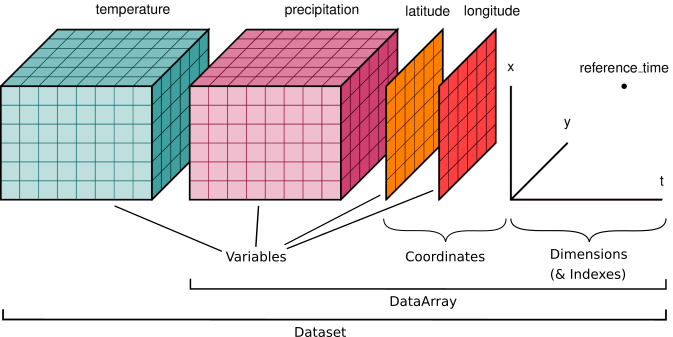

#### **Example 1: GeoData Processing**

"What was the average air temperature in Denver (approx. 40°N, 255°E) during the summer (June-August) of 2013?"

In [ ]:
# Indexing and Selecting Data
import xarray as xr
import numpy as np

ds = xr.tutorial.load_dataset("air_temperature")
ds

<xarray.Dataset> Size: 31MB
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 31MB 241.2 242.5 243.5 ... 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [ ]:
# 1. Get the raw NumPy array
np_array = ds["air"].data
print("NumPy array shape:", np_array.shape)

# 2. Manually find the integer indices for our coordinates.
# This is tedious! We have to look at the coordinate arrays ourselves.
lat_idx = np.abs(ds.lat.values - 40).argmin()
lon_idx = np.abs(ds.lon.values - 255).argmin()

time_start_idx = np.where(ds.time.values == np.datetime64('2013-06-01T00:00:00'))[0][0]
time_end_idx = np.where(ds.time.values == np.datetime64('2013-08-31T18:00:00'))[0][0]

print(f"Indices found: lat={lat_idx}, lon={lon_idx}, time_slice={time_start_idx}:{time_end_idx}")

# 3. Slice the array using these integer indices
denver_summer_2013_np = np_array[time_start_idx:time_end_idx+1, lat_idx, lon_idx]

# 4. Calculate the mean
mean_temp_np = denver_summer_2013_np.mean()

print(f"\nNumPy Result: The average temperature was {mean_temp_np:.2f} K")


NumPy array shape: (2920, 25, 53)
Indices found: lat=14, lon=22, time_slice=604:971

NumPy Result: The average temperature was 292.05 K


In [ ]:
# Use .sel() to select by coordinate values.
# xarray handles finding the nearest point and the time slice automatically.
denver_summer_2013_ds = ds["air"].sel(
    lat=40,
    lon=255,
    method="nearest"  # Find the nearest lat/lon point
).sel(
    time=slice('2013-06-01', '2013-08-31') # Select the date range
)

# We can chain the .mean() operation directly.
mean_temp_xr = denver_summer_2013_ds.mean()

print(f"xarray Result: The average temperature was {mean_temp_xr.item():.2f} K")

xarray Result: The average temperature was 292.05 K


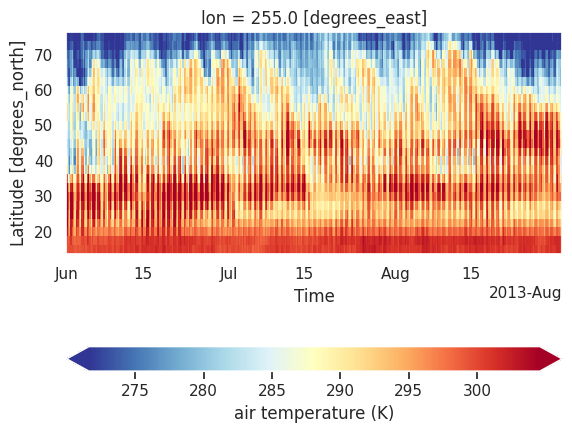

In [ ]:
# Plotting

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

ds_air_temp_gradient = xr.tutorial.open_dataset("air_temperature_gradient")

ds_air_temp_gradient.Tair.sel(lon=255).sel(time=slice('2013-06-01', '2013-08-31')).plot.pcolormesh(
    x="time",  # coordinate to plot on the x-axis of the plot
    robust=True,  # set colorbar limits to 2nd and 98th percentile of data
    cmap=mpl.cm.RdYlBu_r,
    cbar_kwargs={  # passed to plt.colorbar
        "orientation": "horizontal",
        "label": "air temperature (K)",
        "pad": 0.25,
    },
)

#### **Example 2: Create Pokemon Dataset from api to xarray.Dataset**

![source:https://today.line.me/tw/v2/article/NvQEwLp](https://drive.google.com/uc?id=10b42icoUzFuhabTS3q6NctNv5ui-6fRb)


In [ ]:
import requests
import xarray as xr

ids = [
    1, # 種子種子 (bulbasaur)
    6, # 噴火龍 (charizard)
    25, # 皮卡丘 (pikachu) - 路邊野狗
    150, # 超夢 (mewtwo)
    197, # 月伊布 (umbreon)
    445, # 烈咬陸鯊 (garchomp)
    448, # 路卡利歐 (lucario)
]

names = []
hp = []
attack = []
img_urls = []

# get data from pokeapi
for pid in ids:
    url = f'https://pokeapi.co/api/v2/pokemon/{pid}'
    data = requests.get(url).json()
    names.append(data['name'])
    hp.append(data['stats'][0]['base_stat'])
    attack.append(data['stats'][1]['base_stat'])
    img_urls.append(data['sprites']['front_default'])

# Create xarray Dataset
pokemon_ds = xr.Dataset(
    data_vars=dict(
        hp=('pokemon', hp),
        attack=('pokemon', attack),
        img_url=('pokemon', img_urls)
    ),
    coords=dict(
        pokemon=names,  # use name for main coords
        pokemon_id=('pokemon', ids)  # id for extra coords
    )
)

pokemon_ds

<xarray.Dataset> Size: 3kB
Dimensions:     (pokemon: 7)
Coordinates:
  * pokemon     (pokemon) <U9 252B 'bulbasaur' 'charizard' ... 'lucario'
    pokemon_id  (pokemon) int64 56B 1 6 25 150 197 445 448
Data variables:
    hp          (pokemon) int64 56B 45 78 35 106 95 108 70
    attack      (pokemon) int64 56B 49 84 55 110 65 130 110
    img_url     (pokemon) <U80 2kB 'https://raw.githubusercontent.com/PokeAPI...

In [ ]:
# ===== 1. Basic Queries =====
print("=== 1. Basic Queries ===")
print("All Pokémon names:")
print(pokemon_ds.pokemon.values)

print("\nAll HP values:")
print(pokemon_ds.hp.values)

print("\nAll Attack values:")
print(pokemon_ds.attack.values)

# ===== 2. Selecting a Specific Pokémon =====
print("\n=== 2. Selecting a Specific Pokémon ===")
print("Select Pikachu (ID=25):")
pikachu = pokemon_ds.where(pokemon_ds.pokemon_id == 25, drop=True)
print(f"Name: {pikachu.pokemon.values}")
print(f"HP: {pikachu.hp.values}")
print(f"Attack: {pikachu.attack.values}")

# ===== 3. Conditional Filtering =====
print("\n=== 3. Conditional Filtering ===")
print("Pokémon with HP > 100:")
high_hp_pokemon = pokemon_ds.where(pokemon_ds.hp > 100, drop=True)
print("Names:", high_hp_pokemon.pokemon.values)
print("HP:", high_hp_pokemon.hp.values)


=== 1. Basic Queries ===
All Pokémon names:
['bulbasaur' 'charizard' 'pikachu' 'mewtwo' 'umbreon' 'garchomp' 'lucario']

All HP values:
[ 45  78  35 106  95 108  70]

All Attack values:
[ 49  84  55 110  65 130 110]

=== 2. Selecting a Specific Pokémon ===
Select Pikachu (ID=25):
Name: ['pikachu']
HP: [35.]
Attack: [55.]

=== 3. Conditional Filtering ===
Pokémon with HP > 100:
Names: ['mewtwo' 'garchomp']
HP: [106. 108.]


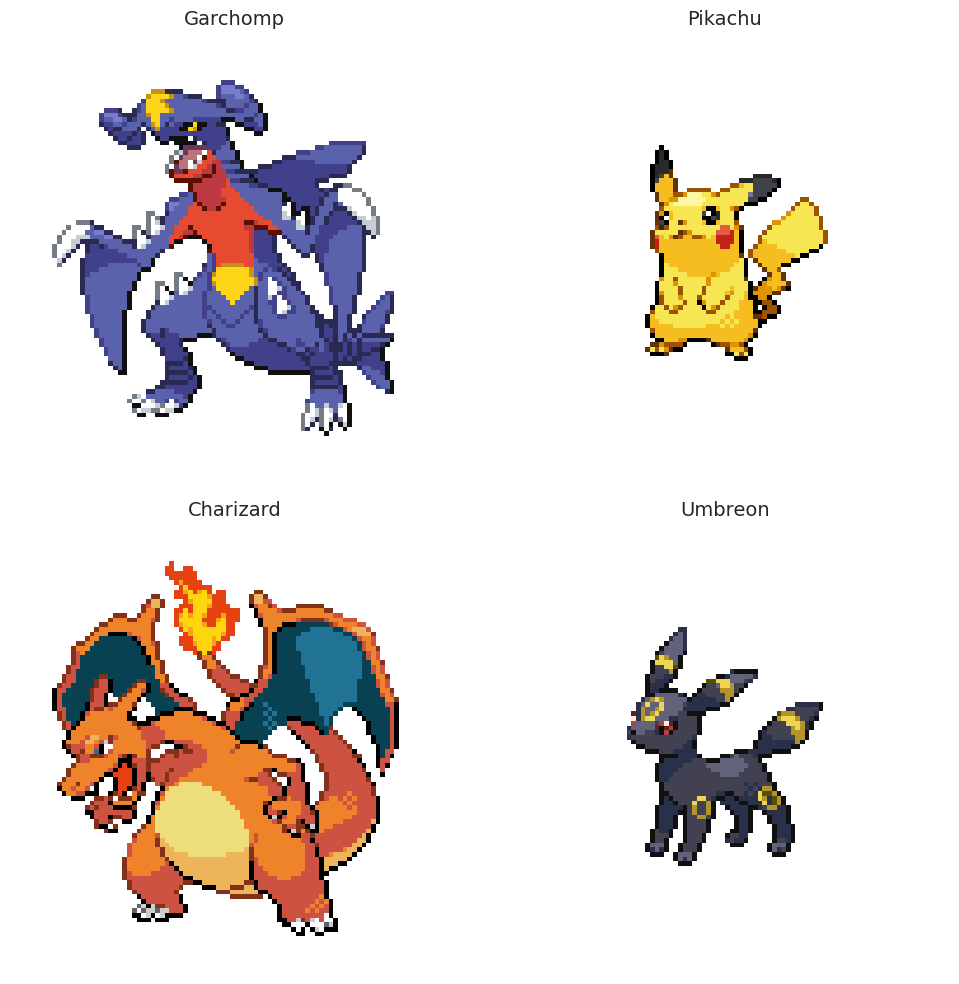

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

# select muti-pokemon name for selecting
pokemon_names = ['garchomp', 'pikachu', 'charizard', 'umbreon']

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.flatten()

for i, name in enumerate(pokemon_names):
    try:
        pokemon = pokemon_ds.sel(pokemon=name) # select
        img_url = pokemon.img_url.item()
        response = requests.get(img_url)
        img = Image.open(BytesIO(response.content))

        axes[i].imshow(img)
        axes[i].set_title(f"{name.title()}", fontsize=14)
        axes[i].axis('off')
    except:
        axes[i].text(0.5, 0.5, f"{name}\n(not found)",
                    ha='center', va='center', fontsize=12)
        axes[i].axis('off')

plt.tight_layout()
plt.show()

## Part 2: Discovering & Accessing Open Data

![source:https://medium.com/data-science/my-experience-with-uploading-a-dataset-on-huggingfaces-dataset-hub-803051942c2d](https://drive.google.com/uc?id=1w86dnyq-4LMCgR6Nc_DlUh2fyT9J--Ed)


### 2.1 Benchmark Open Dataset

**[PyTorch Ecosystem](https://pytorch.org/)**

- **Computer Vision - [TorchVision](https://pytorch.org/vision/stable/)**
  - [Datasets](https://pytorch.org/vision/stable/datasets.html): MNIST, CIFAR-10/100, ImageNet, COCO
  - Models: ResNet, VGG, MobileNet, EfficientNet
  - Transforms: Data augmentation, preprocessing

- **Natural Language Processing - [TorchText](https://pytorch.org/text/stable/)**
  - [Datasets](https://pytorch.org/text/stable/datasets.html): IMDB, AG_NEWS, WikiText, Multi30k
  - Tokenizers: Basic, BPE, SentencePiece
  - Utilities: Vocabulary building, text preprocessing

- **Audio Processing - [TorchAudio](https://pytorch.org/audio/stable/)**
  - [Datasets](https://pytorch.org/audio/stable/datasets.html): LibriSpeech, CommonVoice, GTZAN
  - Transforms: Spectrograms, MFCC, audio augmentation
  - Models: Wav2Vec2, speech recognition pipelines

- **Geospatial & Remote Sensing - [TorchGeo](https://torchgeo.readthedocs.io/)**
  - [Datasets](https://torchgeo.readthedocs.io/en/latest/api/datasets.html): Landsat, Sentinel, OpenStreetMap
  - Applications: Land cover classification, object detection
  - Utilities: Geospatial transforms, coordinate systems

Dataset size: 60000
Number of classes: 10
Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
Image shape: torch.Size([1, 28, 28])



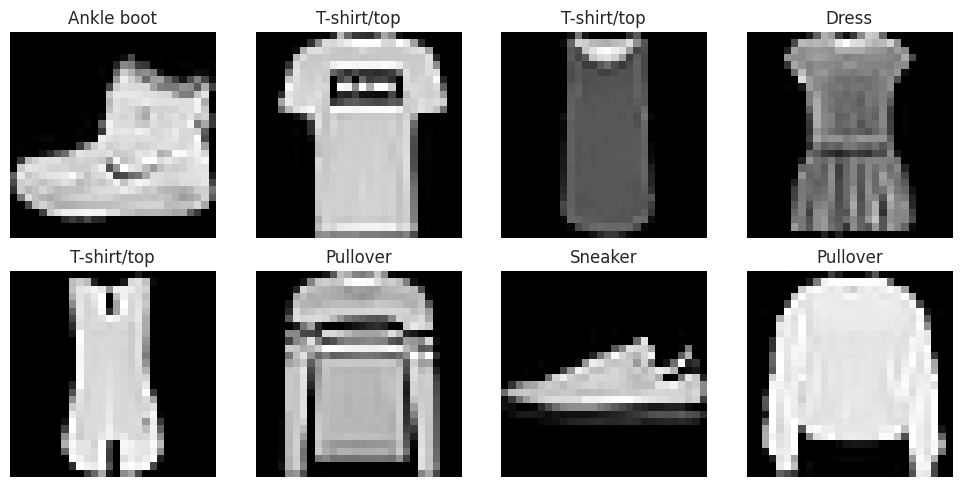

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


# Fashion-MNIST: 28x28 grayscale images, 10 classes, 60,000 training samples
train_dataset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transforms.ToTensor()
)

print(f"Dataset size: {len(train_dataset)}")
print(f"Number of classes: {len(train_dataset.classes)}")
print(f"Class names: {train_dataset.classes}")
print(f"Image shape: {train_dataset[0][0].shape}\n")

# Display some samples
def show_samples(dataset, num_samples=8):
    fig, axes = plt.subplots(2, 4, figsize=(10, 5))
    axes = axes.ravel()

    for i in range(num_samples):
        img, label = dataset[i]
        img = img.squeeze()  # Remove channel dimension for display

        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(f'{dataset.classes[label]}')
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

show_samples(train_dataset)


### 2.2 Community Open Datasets

**[Hugging Face Hub](https://huggingface.co/datasets)**
- **400,000+ Open Source Datasets**
- **Popular Categories**:
- [Text Classification](https://huggingface.co/datasets?task_categories=task_categories:text-classification)
- [Image Classification](https://huggingface.co/datasets?task_categories=task_categories:image-classification)
- [Question Answering](https://huggingface.co/datasets?task_categories=task_categories:question-answering)
- [Translation](https://huggingface.co/datasets?task_categories=task_categories:translation)

**Other Important Resources**:
- **[Papers With Code](https://paperswithcode.com/datasets)** - Academic paper companion datasets
- **[Kaggle Datasets](https://www.kaggle.com/datasets)** - Competition and community datasets
- **[Google Dataset Search](https://datasetsearch.research.google.com/)** - Dataset search engine, ex: [robotics dataset](https://research.google/resources/datasets/?&dataset_types=robotics)

**Reference:**
- [PyTorch Tutorials](https://pytorch.org/tutorials/)
- [Hugging Face Course](https://huggingface.co/course)

### 2.3 Real-world Open Datasets

Cloud object storage (e.g., Amazon S3) serves as the core infrastructure for Data Lakes.

**Key Features:**
- Store data of any format and size
- Support multiple data sources (analytics data, log files, application data, multimedia files)
- Flexible access control and cost optimization
- Integration with AI/ML and advanced analytics services

**Workflow:**
1. **Data Ingestion** - Import data from cloud, applications, or on-premises environments
2. **Data Storage** - Create buckets, configure regions, access permissions, and management options
3. **Data Analysis** - Perform data analysis through AWS or third-party services to gain business insights


![aws-workflow](https://drive.google.com/uc?id=1I5uPhG2YP1q_zYQcLU2tbuKUrP4Trqgy)



---

**Cloud-based Instruction Open Dataset:**

1. **AWS**
  - **[Registry of Open Data on AWS](https://registry.opendata.aws/)**
  - **[AWS marketplace](https://aws.amazon.com/marketplace/search/results?sc_channel=el&FULFILLMENT_OPTION_TYPE=DATA_EXCHANGE&CONTRACT_TYPE=OPEN_DATA_LICENSES&filters=FULFILLMENT_OPTION_TYPE,CONTRACT_TYPE)**


2. **Google**
  - **[Google Cloud Storage](https://cloud.google.com/datasets?hl=zh-tw)**
  - **[Google Cloud Marketplace](https://console.cloud.google.com/marketplace?hl=zh-tw&inv=1&invt=Ab2BqA)**


3. **Microsoft Azure**
  - **[Azure Open Datasets](https://learn.microsoft.com/en-us/azure/open-datasets/dataset-catalog)**





Reference:
- [AWS S3 Introduction](https://aws.amazon.com/tw/s3/)
- [Xarray-tutorial - Finding cloud native data](https://tutorial.xarray.dev/intermediate/remote_data/cmip6-cloud.html)


Example Case: use `fsspec` to get remote data from aws s3


- [S3FS](https://s3fs.readthedocs.io/en/latest/)
- [fsspec](https://filesystem-spec.readthedocs.io/en/latest/)

In [ ]:
!pip install fsspec s3fs -q

In [ ]:
import fsspec

# Create filesystem interface for different storage backends
fs = fsspec.filesystem('s3', anon=True) # Anonymous access

In [ ]:
# example for himawari-satellite L2 clouds product
fs.ls('s3://noaa-himawari9/AHI-L2-FLDK-Clouds/2025/07/06/0400')

['noaa-himawari9/AHI-L2-FLDK-Clouds/2025/07/06/0400/AHI-CHGT_v1r1_h09_s202507060400209_e202507060409403_c202507060417501.nc',
 'noaa-himawari9/AHI-L2-FLDK-Clouds/2025/07/06/0400/AHI-CMSK_v1r1_h09_s202507060400209_e202507060409403_c202507060417501.nc',
 'noaa-himawari9/AHI-L2-FLDK-Clouds/2025/07/06/0400/AHI-CPHS_v1r1_h09_s202507060400209_e202507060409403_c202507060417501.nc']

In [ ]:
glob_file = fs.glob('s3://noaa-himawari9/AHI-L2-FLDK-Clouds/2025/07/06/0400/*.nc')
print(f'Number of files: {len(glob_file)}')

Number of files: 3


In [ ]:
with fs.open(glob_file[0]) as f:
    ds = xr.open_dataset(f)
print(ds)

<xarray.Dataset> Size: 4GB
Dimensions:                     (Rows: 5500, Columns: 5500, CldHgtFlgCnst: 5,
                                 y: 5500, x: 5500)
Coordinates:
    Latitude                    (Rows, Columns) float32 121MB ...
    Longitude                   (Rows, Columns) float32 121MB ...
Dimensions without coordinates: Rows, Columns, CldHgtFlgCnst, y, x
Data variables: (12/48)
    StartRow                    int32 4B ...
    StartColumn                 int32 4B ...
    AchaMode                    float64 8B ...
    NumOfQualityFlag            float32 4B ...
    Shadow_Mask                 (Rows, Columns) float32 121MB ...
    Latitude_Pc                 (Rows, Columns) float32 121MB ...
    ...                          ...
    granule_level_quality_flag  float64 8B ...
    CldOptDpthAWIPS             (y, x) float32 121MB ...
    CldTopHghtAWIPS             (y, x) float32 121MB ...
    CldTopTempAWIPS             (y, x) float32 121MB ...
    CldTopPresAWIPS             (y, x

## Part 3: Tools for Real-World Data & Continuous Learning

So far, we've learned how to handle single, moderately-sized datasets. But in real-world projects, you'll soon face two new challenges: **projects become more complex**, and **data gets much larger**.

This section will introduce the advanced tools to solve these problems and how to continue learning new skills.

### 3.1 Dataset Catalog Management with `Intake`

Intake is a simple but powerful library that transforms this chaos into organized, shareable, and documented data catalogs.


Reference:
- [intake](https://github.com/intake/intake)
- [pangeo-tutorial](https://gallery.pangeo.io/repos/pangeo-data/pangeo-tutorial-gallery/intake.html)


In [ ]:
!pip install intake intake-xarray h5netcdf -q

In [ ]:
# Create a working remote-style catalog
import requests
import yaml

# Example catalog that works
working_catalog = {
    'sources': {
        'xarray_tutorial_air': {
            'description': 'Air temperature tutorial data from xarray',
            'driver': 'netcdf',
            'args': {
                'urlpath': 'https://github.com/pydata/xarray-data/raw/master/air_temperature.nc'
            }
        },
        'xarray_tutorial_rasm': {
            'description': 'RASM model output tutorial data',
            'driver': 'netcdf',
            'args': {
                'urlpath': 'https://github.com/pydata/xarray-data/raw/master/rasm.nc'
            }
        },
        'era5_single_level_sample': {
            'description': 'ERA5 single level reanalysis sample',
            'driver': 'netcdf',
            'args': {
                'urlpath': 'https://github.com/pydata/xarray-data/raw/master/eraint_uvz.nc'
            }
        }
    }
}

# Save as YAML file
with open('remote_catalog.yaml', 'w') as f:
    yaml.dump(working_catalog, f)


# Read from catalog.yaml with intake
import intake
# Use our working catalog
cat = intake.open_catalog('remote_catalog.yaml')

print("Practice with working catalog:")
print("Available datasets:")
for name in cat:
    print(f"  • {name}: {cat[name].description}")

Practice with working catalog:
Available datasets:
  • era5_single_level_sample: ERA5 single level reanalysis sample
  • xarray_tutorial_air: Air temperature tutorial data from xarray
  • xarray_tutorial_rasm: RASM model output tutorial data


In [ ]:
# Load and explore data (no path -> call dataset name)
print("\nLoading air temperature data...")
ds_air = cat.xarray_tutorial_air.to_dask() # open with xarray and use dask for lazy compute
ds_air


Loading air temperature data...


<xarray.Dataset> Size: 31MB
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 31MB dask.array<chunksize=(2920, 25, 53), meta=np.ndarray>
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

Global temperature range: 270.6 to 292.2 K



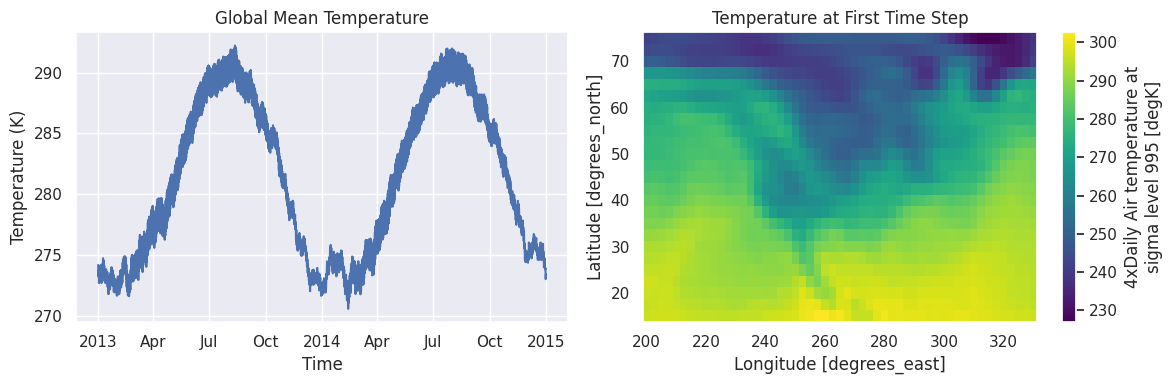

In [ ]:
# Spatial Averaging
global_mean = ds_air.air.mean(['lat', 'lon'])
print(f"Global temperature range: {float(global_mean.min()):.1f} to {float(global_mean.max()):.1f} K\n")

# Plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
global_mean.plot()
plt.title('Global Mean Temperature')
plt.ylabel('Temperature (K)')

plt.subplot(1, 2, 2)
ds_air.air.isel(time=0).plot()
plt.title('Temperature at First Time Step')
plt.tight_layout()
plt.show()


### 3.2 Handing Big Dataset with `Dask` - Lazy computing

But what happens when you use cat.my_dataset.read() and the dataset is 50 GB, but your laptop only has 16 GB of RAM?

**Answer: Your program will crash with a MemoryError.**

This is a fundamental limitation of libraries like Pandas and NumPy—they assume the entire dataset can fit into memory at once.

![ram-crash](https://drive.google.com/uc?id=1mtbjcaI_5DkuYM3z7pWlBDdIGzGditJ9)

`Dask` is a powerful library for parallel computing that lets you work with massive datasets, even on a single machine.


Reference:
- [dask](https://docs.dask.org/en/stable/)
- [dask dataframe](https://docs.dask.org/en/latest/dataframe.html)
- [pangeo-tutorial](https://gallery.pangeo.io/repos/pangeo-data/pangeo-tutorial-gallery/dask.html)


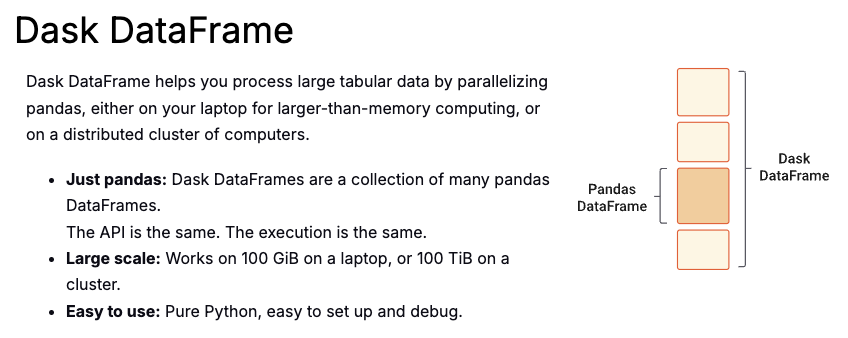

### 3.3 Deep Research Package with `DeepWiki`
![Ref:https://www.reddit.com/r/ProgrammerHumor/comments/1fvd31j/thecodeisthedocumentation/](https://drive.google.com/uc?id=1p_TDkSi-umVawWjSqxNPASVn1TZnItKN)

DeepWiki is a community-driven platform for exploring and learning open-source packages. It provides structured tutorials, practical examples, and insights that help you quickly understand how a library works and how it connects to the tools you already know.


Reference:
- [DeepWiki Homepage](https://deepwiki.org/)
- [DeepWiki xarray Page](https://deepwiki.com/pydata/xarray)

# Visulization

## 1. Install Required Package: hvplot

Before using `hvplot` for interactive plotting, make sure the following packages are installed:

- `hvplot`: A high-level plotting API for data structures like pandas and xarray.
- `jupyter_bokeh`: Enables proper rendering of Bokeh-based plots in Jupyter Notebooks.

In [ ]:
!pip install hvplot
!pip install jupyter_bokeh

## 2. Load Data

In [ ]:
import xarray as xr

ds = xr.tutorial.load_dataset("air_temperature")
air = ds["air"]  # shape: (time, lat, lon)
air_0 = air.isel(time=0) # Select the first time slice

In [ ]:
import pandas_datareader.data as web
import xarray as xr
import datetime

start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2024, 12, 31)

df = web.DataReader("SP500", "fred", start, end)

fred_ds = df.to_xarray()

In [ ]:
import xarray as xr
import numpy as np
from PIL import Image
import requests
from io import BytesIO

ids = [1, 25, 4, 445]
images = []
for pid in ids:
    url = f'https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/{pid}.png'
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)).convert('RGBA')
    images.append(np.array(img))

pokemon_ds = xr.DataArray(
    np.stack(images),
    dims=('pokemon', 'y', 'x', 'rgba'),
    coords={'pokemon': ids}
)

## 3. Visualization

## 3.1. Seaborn

### 3.1.1. General Plotting Formula

```python
ax = sns.function_name(
    data=df,
    x="x_column",               # Column for x-axis (required for most plots)
    y="y_column",               # Column for y-axis (optional for some plots)
    hue="group_column",         # Grouping by color (optional)
    style="style_column",       # Different marker/line style per group (optional)
    size="size_column",         # Variable marker size (scatter-like plots, optional)
    row="row_facet",            # For multi-plot grids (FacetGrid functions)
    col="col_facet",            # For multi-plot grids (FacetGrid functions)
    kind="plot_type",           # For high-level APIs like `catplot`, `relplot`
    ...
)
```

---

### What Each Parameter Does

| Parameter | Description | Typical Use Case |
|-----------|-------------|------------------|
| `data`    | The Pandas DataFrame containing your data | Always required |
| `x`       | Column mapped to the x-axis | Categories or time axis |
| `y`       | Column mapped to the y-axis | Quantitative value |
| `hue`     | Column mapped to color | Groups by category (e.g., gender, species) |
| `style`   | Column mapped to line or marker style | Differentiates groups visually |
| `size`    | Column mapped to marker size | Highlights magnitude (e.g., population size) |
| `row`, `col` | Used for faceting in `catplot` or `relplot` | Subplots by category |
| `kind`    | Used in figure-level functions like `relplot`, `catplot` | Choose plot type (e.g., `"scatter"`, `"line"`, `"box"`) |

---

### Functions That Support This Structure

Many Seaborn functions follow this formula. Examples include:

- `sns.scatterplot()`  
- `sns.lineplot()`  
- `sns.boxplot()`  
- `sns.violinplot()`  
- `sns.barplot()`  
- `sns.histplot()`  
- `sns.catplot()` (with `kind=...`)  
- `sns.relplot()` (with `kind=...`)  
- `sns.lmplot()`  

---

### 3.1.2. Theme Settings

### `sns.set_theme()`: Set Default Style

Use `sns.set_theme()` to apply consistent and beautiful styles globally.  
It configures background grid, color palette, and context (scaling) in one line.

```python
sns.set_theme(style="whitegrid", palette="pastel", context="notebook")
```

#### 🔧 Parameters

| Parameter  | Options                                                  | Description                          |
|------------|----------------------------------------------------------|--------------------------------------|
| `style`    | `"whitegrid"`, `"darkgrid"`, `"white"`, `"ticks"`        | Background and gridlines             |
| `palette`  | `"deep"`, `"muted"`, `"pastel"`, `"dark"`, `"colorblind"`| Default color palette for all plots  |
| `context`  | `"notebook"`, `"talk"`, `"poster"`, `"paper"`            | Font size and scaling for context    |

---

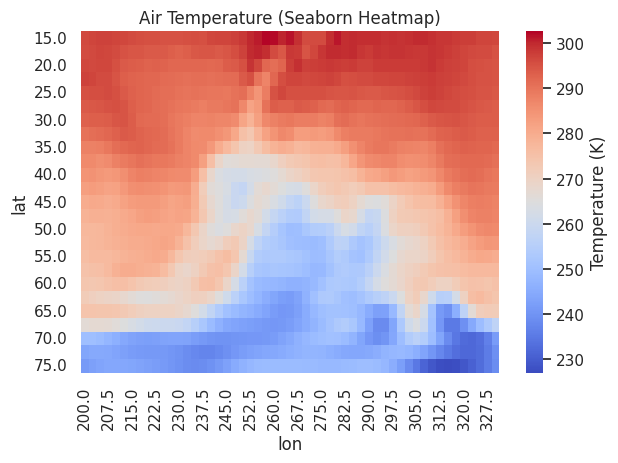

In [ ]:
import seaborn as sns
import pandas as pd

# Convert xarray to DataFrame
df = air_0.to_dataframe().reset_index()

# Pivot to make a 2D grid (lat x lon)
pivoted = df.pivot(index="lat", columns="lon", values="air")

# Apply seaborn theme
sns.set_theme()

# Create heatmap
ax = sns.heatmap(pivoted, cmap="coolwarm", cbar_kws={"label": "Temperature (K)"})
ax.set_title("Air Temperature (Seaborn Heatmap)")

# Save figure from ax
fig = ax.get_figure()
fig.tight_layout()  # Avoid clipping
fig.savefig("air_temperature(seaborn).png", dpi=300)
fig.savefig("air_temperature(seaborn).svg")


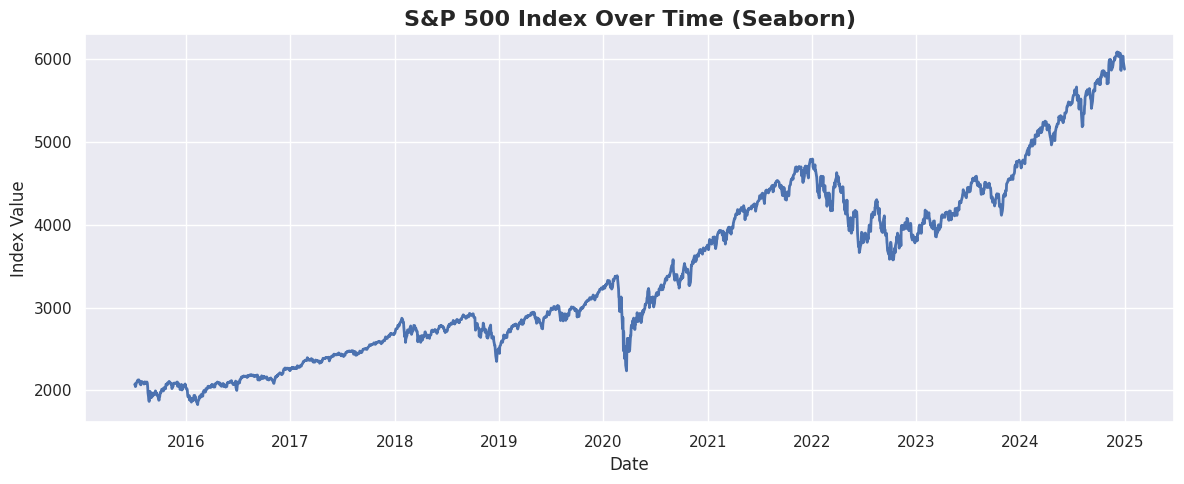

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = fred_ds.to_dataframe().reset_index()  # xarray → DataFrame
df = df.dropna()

sns.set_theme(style="darkgrid")

plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x="DATE", y="SP500", linewidth=2)

plt.title("S&P 500 Index Over Time (Seaborn)", fontsize=16, fontweight="bold")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Index Value", fontsize=12)

plt.tight_layout()
plt.show()


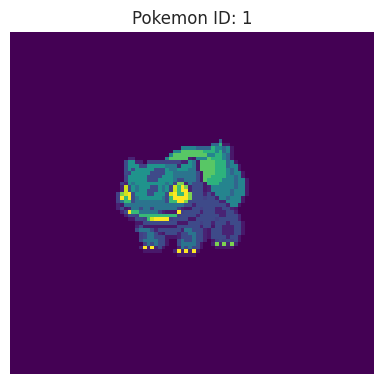

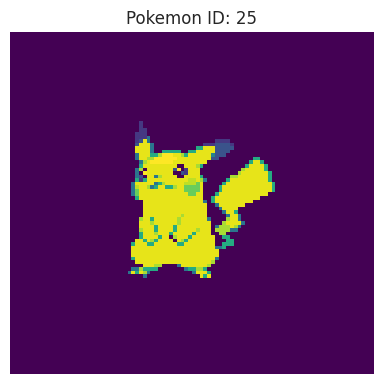

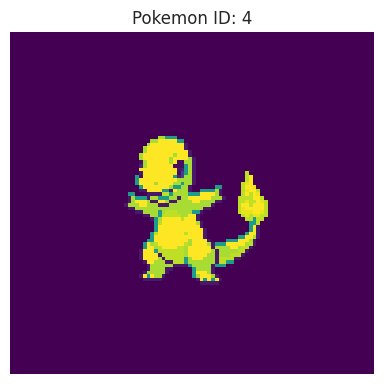

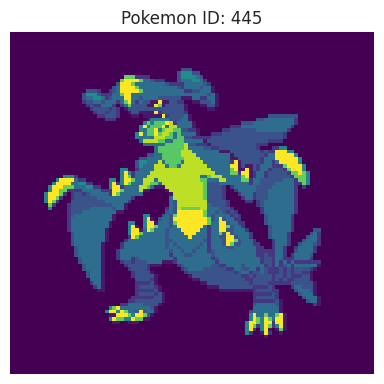

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

for i in range(pokemon_ds.sizes["pokemon"]):
    rgba_img = pokemon_ds.isel(pokemon=i).values  # shape: (96, 96, 4)

    gray = rgba_img[..., 0].astype(float)

    plt.figure(figsize=(4, 4))
    sns.heatmap(gray, cmap='viridis', cbar=False, xticklabels=False, yticklabels=False)
    plt.title(f"Pokemon ID: {pokemon_ds.pokemon.values[i]}")
    plt.axis('off')
    plt.tight_layout()
    plt.show()


## 3.2. hvplot

### 3.2.1. General Plotting Formula

```python
import hvplot.pandas  # or hvplot.xarray, hvplot.dask

df.hvplot(
    kind="scatter",     # or "line", "bar", "heatmap", etc.
    x="x_column",
    y="y_column",
    by="group_column",  # optional
    width=800,
    height=400,
    title="Your Plot Title"
)
```

You can also omit `kind` if your data shape is unambiguous:

```python
df.hvplot(x="x_column", y="y_column")
```

---

### 🔍 Common Parameters

| Parameter   | Description                                  |
|-------------|----------------------------------------------|
| `x`, `y`    | Axis columns (or Xarray dimensions)          |
| `kind`      | Plot type: `"line"`, `"scatter"`, `"bar"`, `"hist"` |
| `by`        | Grouping column                              |
| `c` / `color`| Coloring variable or column (for maps)       |
| `width` / `height` | Plot size                             |
| `title`     | Plot title                                   |
| `clim`, `cmap` | Color limits and colormap                 |

---

In [ ]:
import hvplot.xarray  # Ensure hvplot is installed

air_0.hvplot.image(
    x="lon", y="lat", cmap="coolwarm", clim=(230, 310),
    colorbar=True, title="Air Temperature (hvPlot)",
    width=600, height=400
)

:Image   [lon,lat]   (4xDaily Air temperature at sigma level 995)

In [ ]:
import xarray as xr
import hvplot.pandas
import pandas as pd
import panel as pn

pn.extension()

df = fred_ds.to_dataframe().reset_index()
df = df.dropna()

plot = df.hvplot.line(
    x='DATE', y='SP500',
    title='S&P 500 Index Over Time (hvPlot)',
    xlabel='Date', ylabel='Index Value',
    line_width=2, height=400, width=800
)

pn.pane.HoloViews(plot).servable()


HoloViews(Curve, height=400, sizing_mode='fixed', width=800)

In [ ]:
import xarray as xr
import hvplot.xarray
import numpy as np
import panel as pn

pn.extension()

def to_rgb_array(pokemon_id):
    rgb = pokemon_ds.sel(pokemon=pokemon_id).values[..., :3] / 255.0  # shape = (y, x, 3)
    rgb = np.flip(rgb, axis=0)  # flip along y-axis
    # Transpose to (band, y, x)
    rgb_transposed = np.transpose(rgb, (2, 0, 1))
    return xr.DataArray(
        rgb_transposed,
        dims=["band", "y", "x"],
        coords={"band": ["R", "G", "B"], "y": pokemon_ds.coords["y"], "x": pokemon_ds.coords["x"]}
    )

plots = []
for pid in pokemon_ds.coords["pokemon"].values:
    rgb_da = to_rgb_array(pid)
    plot = rgb_da.hvplot.rgb(x="x", y="y", r="R", g="G", b="B", title=f"Pokemon ID: {pid}", width=250, height=250)
    plots.append(plot)

pn.Row(*plots).servable()

Row
    [0] HoloViews(RGB, height=250, sizing_mode='fixed', width=250)
    [1] HoloViews(RGB, height=250, sizing_mode='fixed', width=250)
    [2] HoloViews(RGB, height=250, sizing_mode='fixed', width=250)
    [3] HoloViews(RGB, height=250, sizing_mode='fixed', width=250)

## 3.3. Matplotlib

### 3.3.1. Customizing Font and Text Appearance
Matplotlib provides flexible control over text rendering, including **font family**, **size**, **weight**, and **style** for all plot elements like titles, axis labels, ticks, legends, and annotations.

---

### Common Text Parameters

| Parameter     | Description                              | Example Values             |
|---------------|------------------------------------------|----------------------------|
| `fontsize`    | Font size                                | `10`, `12`, `14`, etc.     |
| `fontweight`  | Font weight (boldness)                   | `'normal'`, `'medium'`, `'bold'`, `'heavy'`, `'light'` |
| `fontstyle`   | Font style (optional)                    | `'normal'`, `'italic'`, `'oblique'` |
| `fontname`    | Specific font family name                | `'Arial'`, `'Times New Roman'`, `'DejaVu Sans'`, `'Noto Sans'` |
| `color`       | Text color                               | `'black'`, `'gray'`, `'#3366cc'`, etc. |
| `rotation`    | Text rotation angle                      | `0`, `45`, `90`, `-45`, etc. |

---

For a full list of font and text properties, refer to the official Matplotlib documentation: https://matplotlib.org/stable/users/explain/text/text_props.html

### Where Can You Use These?

You can apply text parameters in:

#### (1) **Titles**
```python
plt.title("Title Text", fontsize=16, fontweight='bold', fontname='Arial')
```
#### (2) **Axis Labels**
```python
plt.xlabel("X-Axis", fontsize=14, fontweight='medium', fontname='Times New Roman')
plt.ylabel("Y-Axis", fontsize=14, fontweight='medium', fontname='Times New Roman')
```
#### (3) **Ticks**
```python
plt.xticks(fontsize=12, fontweight='normal', fontname='DejaVu Sans')
plt.yticks(fontsize=12, fontweight='normal', fontname='DejaVu Sans')
```

#### (4) **Colorbar Labels**
```python
cbar.set_label("Temperature (K)", fontsize=12, fontweight='medium', fontname='Arial')
```

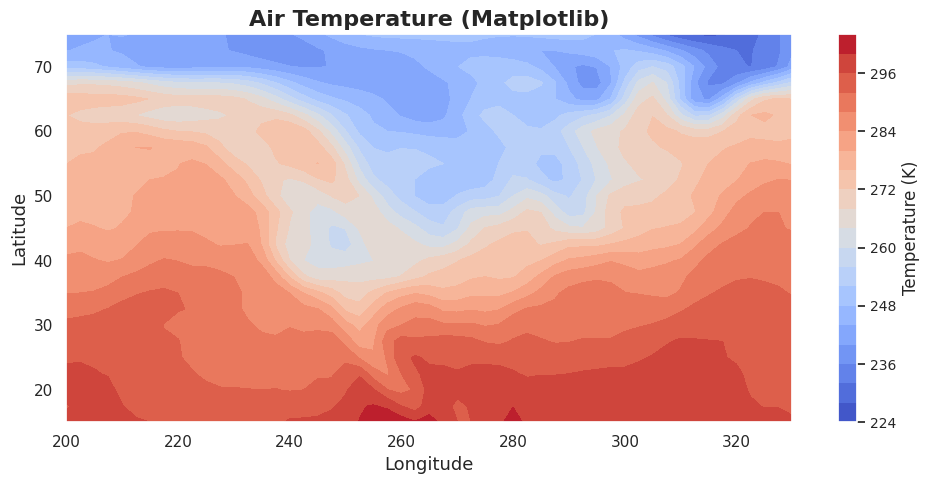

In [ ]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(10, 5))

# Filled contour plot
contour = plt.contourf(
    air_0["lon"], air_0["lat"], air_0,
    cmap="coolwarm", levels=20
)

# Title and axis labels with font styling
plt.title("Air Temperature (Matplotlib)",
          fontsize=16, fontweight='bold', fontname='DejaVu Sans')
plt.xlabel("Longitude",
           fontsize=13, fontweight='medium', fontname='DejaVu Sans')
plt.ylabel("Latitude",
           fontsize=13, fontweight='medium', fontname='DejaVu Sans')

# Tick label styling
plt.xticks(fontsize=11, fontweight='normal', fontname='DejaVu Sans')
plt.yticks(fontsize=11, fontweight='normal', fontname='DejaVu Sans')

# Add colorbar with label styling
cbar = plt.colorbar(contour)
cbar.set_label("Temperature (K)", fontsize=12, fontweight='medium', fontname='DejaVu Sans')
cbar.ax.tick_params(labelsize=10)

# Optional: add grid
plt.grid(True, linestyle="--", alpha=0.5)

# Adjust layout before saving
plt.tight_layout()

# Save as SVG (scalable, ideal for publication)
plt.savefig("air_temperature(matplotlib).svg", format="svg")

# Save as high-resolution PNG (suitable for presentations)
plt.savefig("air_temperature(matplotlib).png", format="png", dpi=300)

# Show the plot
plt.show()


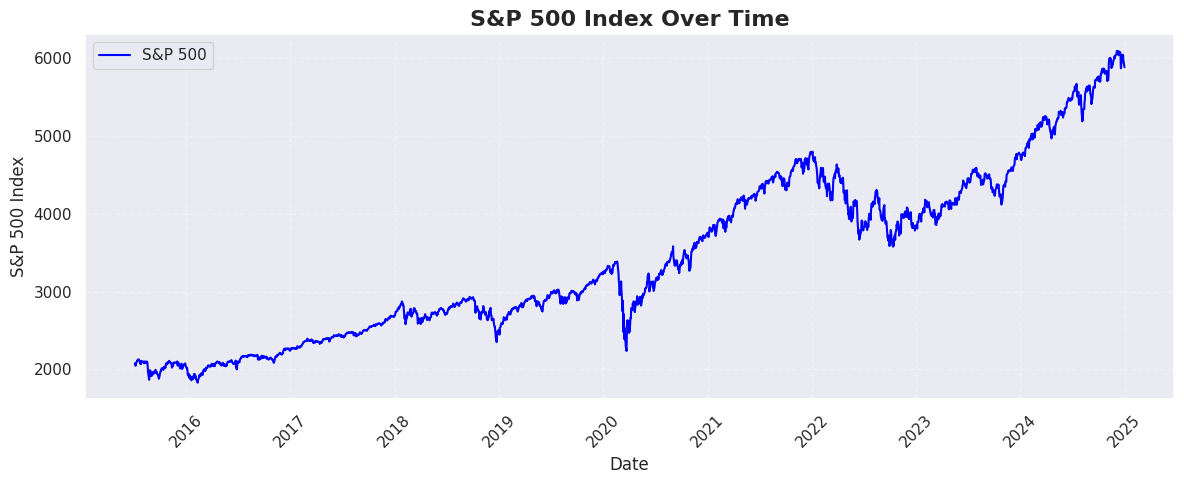

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt

df = fred_ds.to_dataframe().reset_index()
df = df.dropna()

plt.figure(figsize=(12, 5))
plt.plot(df["DATE"], df["SP500"], label="S&P 500", color="blue")

plt.title("S&P 500 Index Over Time", fontsize=16, fontweight="bold")
plt.xlabel("Date", fontsize=12)
plt.ylabel("S&P 500 Index", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()

plt.savefig("sp500_matplotlib.png", dpi=300)
plt.savefig("sp500_matplotlib.svg")

plt.show()


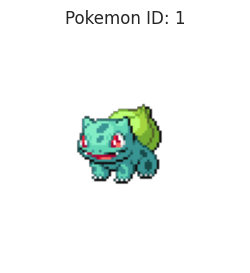

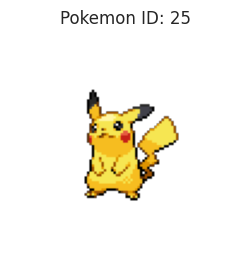

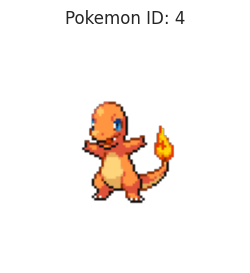

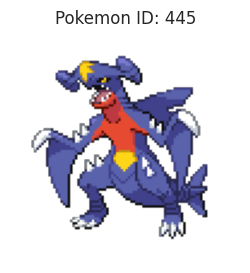

In [ ]:
for i, p_id in enumerate(pokemon_ds.coords["pokemon"].values):
    img = pokemon_ds.sel(pokemon=p_id).values  # shape: (96, 96, 4)

    plt.figure(figsize=(3, 3))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Pokemon ID: {p_id}")
    plt.show()

## 3.4. Plotly

### 3.4.1. General Plotting Formula


Plotly Express provides a concise syntax for most chart types:

```python
import plotly.express as px

fig = px.function_name(
    data_frame=df,
    x="x_column",
    y="y_column",
    color="group_column",     # optional
    symbol="style_column",    # optional
    size="size_column",       # optional
    facet_row="row_category", # optional
    facet_col="col_category", # optional
    title="Your Plot Title"
)

fig.show()
```

---

### 🔍 Parameter Overview

| Parameter      | Description                                    |
|----------------|------------------------------------------------|
| `data_frame`   | The input DataFrame (usually pandas)           |
| `x`, `y`       | Columns mapped to axes                         |
| `color`        | Grouping by color (categorical or continuous)  |
| `symbol`       | Marker shape (for scatter/line plots)          |
| `size`         | Marker size (bubble plots, etc.)               |
| `facet_row/col`| Create subplot grids based on a category       |
| `title`        | Plot title                                     |

---

In [ ]:
import plotly.express as px

fig = px.imshow(
    air_0.values,
    x=air_0["lon"].values,
    y=air_0["lat"].values,
    labels={"x": "Longitude", "y": "Latitude", "color": "K"},
    color_continuous_scale="RdBu_r",
    title="Air Temperature (Plotly)"
)
fig.update_yaxes(autorange="reversed")  # adjust lat lon sequence
fig.show()

In [ ]:
import xarray as xr
import pandas as pd
import plotly.express as px


df = fred_ds.to_dataframe().reset_index()
df = df.dropna()


fig = px.line(
    df,
    x="DATE",
    y="SP500",
    title="S&P 500 Index Over Time",
    labels={"DATE": "Date", "SP500": "S&P 500 Index"},
    template="plotly_white"
)

fig.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    xaxis_tickangle=-45,
    margin=dict(l=40, r=30, t=60, b=60)
)

fig.show()


In [ ]:
import plotly.express as px
import xarray as xr

for p_id in pokemon_ds.coords["pokemon"].values:
    img = pokemon_ds.sel(pokemon=p_id).values  # shape: (96, 96, 4)

    fig = px.imshow(
        img,
        binary_string=True,
        origin="upper",
        title=f"Pokemon ID: {p_id}"
    )
    fig.update_layout(
        width=250,
        height=250,
        margin=dict(l=10, r=10, t=40, b=10),
        xaxis=dict(showticklabels=False),
        yaxis=dict(showticklabels=False)
    )
    fig.show()


# 簽到表單

https://forms.gle/Ay3MvoWfRWf2wLLTA